In [1]:
%matplotlib inline
import molsysmt as msm
import networkx as nx
import numpy as np
import numpy.linalg as LA
from numpy import copy
import matplotlib.pyplot as plt 
import pandas as pd
from pylab import *

### Loading and preprocessing the molecular system

In [2]:
mol_system = msm.convert("1TCD", "molsysmt.MolSys")
mol_system = msm.remove_solvent(mol_system, water=True, ions=True)
mol_system = msm.add_missing_hydrogens(mol_system, pH=7.4)
msm.info(mol_system, target="component")

/Users/danielibarrola/Documents/molsys/MolSys_v0.1/MolSysMT/molsysmt/native/io/topology/classes/mmtf_MMTFDecoder.py:43: UserWarning: The structure in the PDB has biological assemblies. There are geometrical transformations proposed in the structure. See the following issue in the source code repository: https://github.com/uibcdf/MolSysMT/issues/33
  warnings.warn(warning_message)


index,n atoms,n groups,chain index,molecule index,molecule type,entity index,entity name
0,3848,248,0,0,protein,0,Protein_0
1,3859,249,1,1,protein,1,Protein_1


### Creating a multigraph for the molecular system
The graph includes atom names as node data, and distances and angles as edge data

In [3]:
def get_bond_lenght(bonded_atoms, coordinates, indices, cero_indx=True):
    """Computes ths distance between bonded atoms"""
    distance = np.zeros(bonded_atoms.shape[0]) # initialize distance array
    coordinates = np.array(coordinates[0,:,:]) # convert to array to avoid error in numpy norm function
    
    bonded_atoms_copy = copy(bonded_atoms) # create a coppy of the array so it's not modified
    
    if not cero_indx:
       
        indx_dict = {value:index for index,value in enumerate(indices)} # dictionary with keys as the array value and values as the array index
        for k, v in indx_dict.items(): bonded_atoms_copy[bonded_atoms==k] = v
    
    coords_between_bonded_atoms = coordinates[bonded_atoms_copy] #matrix with pairs of coordiantes between bonded atoms
    bond_vectors = np.diff(coords_between_bonded_atoms, axis=1) #compute vectors for each pair of coordinates

    distance = LA.norm(bond_vectors, axis=-1)
    
    return distance


In [4]:
def molecular_graph(molecular_system, selection='all'):
    """
       Transform a molecular system to a Networkx multigraph.
       Nodes are named by atom indices and they contain atom names as data.
       Edges represent bonds and they contain bond lenght and bond angle.
    """
    Graph = nx.MultiGraph()

    indices, types, names, bonded_atoms, coords = msm.get(molecular_system, selection=selection, target="atom", 
                                           atom_index=True, atom_type=True, name=True, inner_bonded_atoms=True, coordinates=True)
    cero_indx = True
    if not selection == 'all' or not selection == 'molecule_index==0':
        cero_indx = False #If selection isn't 'all' the indices array will not start at 0, causing an error in the distance function
    
    distances = get_bond_lenght(bonded_atoms, coords, indices, cero_indx=cero_indx)
    
    # print(coords.shape)
    
    for i in range(len(indices)):
        Graph.add_node(indices[i], atom_name=names[i], atom_type=types[i], coordinates=coords[0, i, :])
        Graph.add_edge(bonded_atoms[i,0], bonded_atoms[i,1], distance=distances[i][0])
    
    return Graph
 

In [5]:
graph = molecular_graph(mol_system, selection='molecule_index==0')

/Users/danielibarrola/miniconda3/envs/openpharmacophore/lib/python3.7/site-packages/ipykernel_launcher.py:4: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  after removing the cwd from sys.path.


In [6]:
print("Number of nodes: {}".format(len(graph.nodes())))
print("Number of edges: {}".format(len(graph.edges())))
# Print a sample of the nodes and edges
print(graph.nodes[0])
print(graph.nodes[1])
print(graph[1][0][0])

Number of nodes: 3848
Number of edges: 3848
{'atom_name': 'N', 'atom_type': 'N', 'coordinates': <Quantity([1.84669995 2.76379991 8.36610031], 'nanometer')>}
{'atom_name': 'H', 'atom_type': 'H', 'coordinates': <Quantity([1.93230224 2.77239203 8.44974422], 'nanometer')>}
{'distance': 0.11999116567518396}


## Graph of a smaller molecule

In [7]:
molecular_system_2 = msm.convert('1NCR', 'molsysmt.MolSys')
molecular_system_2 = msm.remove_solvent(molecular_system_2, water=True, ions=True)
molecular_system_2 = msm.add_missing_hydrogens(molecular_system_2, pH=7.4)
msm.info(molecular_system_2, target='component')

/Users/danielibarrola/Documents/molsys/MolSys_v0.1/MolSysMT/molsysmt/native/io/topology/classes/mmtf_MMTFDecoder.py:43: UserWarning: The structure in the PDB has biological assemblies. There are geometrical transformations proposed in the structure. See the following issue in the source code repository: https://github.com/uibcdf/MolSysMT/issues/33
  warnings.warn(warning_message)


index,n atoms,n groups,chain index,molecule index,molecule type,entity index,entity name
0,4489,285,0,0,protein,0,Protein_0
1,7571,490,1,1,protein,1,Protein_1
2,104,7,3,2,peptide,2,Peptide_0
3,332,22,3,3,peptide,3,Peptide_1
4,27,1,4,4,small molecule,4,W11
5,15,1,5,5,small molecule,5,MYR


In [41]:
mol_graph = molecular_graph(molecular_system_2, selection='entity_name=="W11"')

/Users/danielibarrola/miniconda3/envs/openpharmacophore/lib/python3.7/site-packages/ipykernel_launcher.py:4: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  after removing the cwd from sys.path.


In [42]:
mol_graph.nodes(data=True)

NodeDataView({12496: {'atom_name': 'O1', 'atom_type': 'O', 'coordinates': <Quantity([ 3.88779998  0.39070001 12.4467001 ], 'nanometer')>}, 12497: {'atom_name': 'N2', 'atom_type': 'N', 'coordinates': <Quantity([ 3.77029991  0.47659999 12.48340034], 'nanometer')>}, 12498: {'atom_name': 'C3', 'atom_type': 'C', 'coordinates': <Quantity([ 3.70569992  0.50120002 12.37040043], 'nanometer')>}, 12499: {'atom_name': 'CM3', 'atom_type': 'C', 'coordinates': <Quantity([ 3.58270001  0.58609998 12.38150024], 'nanometer')>}, 12500: {'atom_name': 'C4', 'atom_type': 'C', 'coordinates': <Quantity([ 3.76990008  0.4393     12.26089954], 'nanometer')>}, 12501: {'atom_name': 'C5', 'atom_type': 'C', 'coordinates': <Quantity([ 3.88089991  0.37189999 12.30770016], 'nanometer')>}, 12502: {'atom_name': 'C1C', 'atom_type': 'C', 'coordinates': <Quantity([ 3.98880005  0.28819999 12.24479961], 'nanometer')>}, 12503: {'atom_name': 'C2C', 'atom_type': 'C', 'coordinates': <Quantity([ 4.12060022  0.33829999 12.29880047],

In [43]:
mol_graph.edges(data=True)

MultiEdgeDataView([(12496, 12497, {'distance': 0.15010656319710355}), (12496, 12501, {'distance': 0.14043516221864846}), (12497, 12498, {'distance': 0.13246622692921933}), (12498, 12499, {'distance': 0.14986722940284633}), (12498, 12500, {'distance': 0.14122222617155478}), (12500, 12501, {'distance': 0.13803629658011365}), (12501, 12502, {'distance': 0.1503482934128357}), (12502, 12503, {'distance': 0.15098803996110333}), (12503, 12504, {'distance': 0.14830871089804298}), (12504, 12505, {'distance': 0.14171466738779773}), (12505, 12506, {'distance': 0.14386469082622197}), (12506, 12507, {'distance': 0.14471957178289618}), (12506, 12512, {'distance': 0.14920501315636975}), (12507, 12508, {'distance': 0.1473623559884321}), (12507, 12509, {'distance': 0.14006471570304158}), (12509, 12510, {'distance': 0.14257021629211808}), (12510, 12511, {'distance': 0.14644803243576446}), (12510, 12514, {'distance': 0.14640595342950616}), (12511, 12512, {'distance': 0.1457833580717006}), (12512, 12513, 

In [44]:
print("Number of nodes: {}".format(len(mol_graph.nodes())))
print("Number of edges: {}".format(len(mol_graph.edges())))

Number of nodes: 27
Number of edges: 27


In [45]:
print(mol_graph.nodes[12520])
# Two of the fluorine atoms are not bonded
print(mol_graph.nodes[12521])
print(mol_graph.nodes[12522])

{'atom_name': 'F1', 'atom_type': 'F', 'coordinates': <Quantity([ 4.97380018 -0.33050001 12.27929974], 'nanometer')>}
{'atom_name': 'F2', 'atom_type': 'F', 'coordinates': <Quantity([ 5.0236001  -0.43169999 12.08759975], 'nanometer')>}
{'atom_name': 'F3', 'atom_type': 'F', 'coordinates': <Quantity([ 4.92810011 -0.55180001 12.24629974], 'nanometer')>}


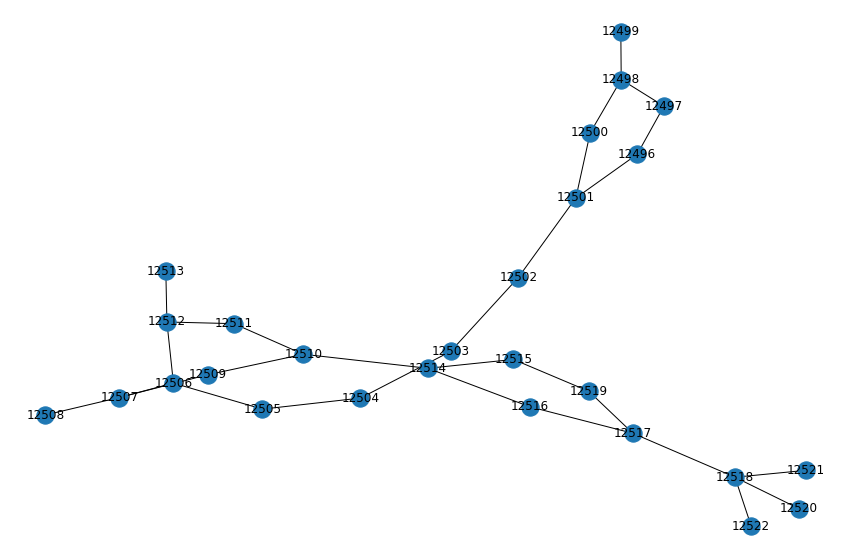

In [46]:
# Add the missing bonds
mol_graph.add_edge(12521, 12518)
mol_graph.add_edge(12522, 12518)

fig, ax = plt.subplots(figsize=(15,10))
nx.draw(mol_graph, with_labels=True, ax=ax)
show()

In [47]:
# Degree is the number of edges adjacent to a node
mol_graph.degree()

MultiDegreeView({12496: 2, 12497: 2, 12498: 3, 12499: 1, 12500: 2, 12501: 3, 12502: 2, 12503: 2, 12504: 2, 12505: 2, 12506: 3, 12507: 3, 12508: 1, 12509: 2, 12510: 3, 12511: 2, 12512: 3, 12513: 1, 12514: 3, 12515: 2, 12516: 2, 12517: 3, 12518: 4, 12519: 2, 12520: 1, 12521: 1, 12522: 1})

## Calculating bond angles 

In [18]:
def nCr(n,r):
    """Compute number of combinations"""
    f = math.factorial
    return f(n) // f(r) // f(n-r)

def get_bond_angles(centroid, vertices, atom_names=[], verbose=False):
    
    """Compute bond angle between a central atom and two adjacent atoms
        Bond angles are calculated for each combination of central atom and adjacent atoms
    """
    
    bond_vectors = vertices - centroid
    bond_lenght = LA.norm(bond_vectors, axis=-1)

    # print(bond_vectors, '\n')

    ii = bond_vectors.shape[0]
    
    m = nCr(ii, 2)
    angles = np.zeros((m,1))
    
    k = 0
    # Calculate angle between each different pair of vectors
    for i in range(ii - 1):
        for j in range(i + 1, ii):
            angle = np.degrees(np.arccos(np.dot(bond_vectors[i, :], bond_vectors[j, :]) / (bond_lenght[i] * bond_lenght[j])))
            angles[k] = angle
            k += 1
            if verbose and len(atom_names) > 0:
                print("Angle between atom {}, atom {} and atom {} is: {:.2f}".format(atom_names[i+1],
                                                             atom_names[0],
                                                             atom_names[j+1],              
                                                             angle))
    k += 1
    
    return angles

In [30]:
def count_atoms_with_n_bonds(n, mol_graph):
    """Count atoms with more than n bonds"""
    count = 0
    for atom, n_bonds in mol_graph.degree():
        if n_bonds > n:
            count += 1
        else:
            continue
    return count

In [33]:
def mean_bond_angles(mol_graph, verbose=False):
    
    """Compute mean bond angle for each central atom"""
    
    n_centroid_atoms = count_atoms_with_n_bonds(1, mol_graph) # Count number of central atoms
    centroid_mean_angle = np.zeros((n_centroid_atoms,2)) # Initialize array

    i = 0
    for atom, neighbors in mol_graph.adjacency(): #adjacency returns an iterator for the neighbors

        atom_names = [mol_graph.nodes[atom]['atom_name']]  # List with atom names
        centroid = np.array(mol_graph.nodes[atom]['coordinates'])
        n_neighbors = len(list(neighbors))

        if n_neighbors > 1:

            vertices = np.zeros((n_neighbors, 3))
            for j, nbr_atom in enumerate(list(neighbors)):
                vertices[j, :] = np.array(mol_graph.nodes[nbr_atom]['coordinates'])
                atom_names.append(mol_graph.nodes[nbr_atom]['atom_name'])

            angles = get_bond_angles(centroid, vertices, atom_names, verbose=verbose)
            centroid_mean_angle[i, 0] = atom
            centroid_mean_angle[i, 1] = np.mean(angles)

        else:
            continue

        i += 1
        
    return centroid_mean_angle

In [49]:
centroid_mean_angle = mean_bond_angles(mol_graph, verbose=True)

Angle between atom N2, atom O1 and atom C5 is: 106.27
Angle between atom O1, atom N2 and atom C3 is: 106.23
Angle between atom N2, atom C3 and atom CM3 is: 116.25
Angle between atom N2, atom C3 and atom C4 is: 111.00
Angle between atom CM3, atom C3 and atom C4 is: 132.75
Angle between atom C3, atom C4 and atom C5 is: 108.46
Angle between atom O1, atom C5 and atom C4 is: 108.04
Angle between atom O1, atom C5 and atom C1C is: 116.96
Angle between atom C4, atom C5 and atom C1C is: 135.00
Angle between atom C5, atom C1C and atom C2C is: 106.98
Angle between atom C1C, atom C2C and atom C3C is: 110.06
Angle between atom C2C, atom C3C and atom O1B is: 101.40
Angle between atom C3C, atom O1B and atom C1B is: 116.01
Angle between atom O1B, atom C1B and atom C2B is: 117.51
Angle between atom O1B, atom C1B and atom C6B is: 125.89
Angle between atom C2B, atom C1B and atom C6B is: 116.60
Angle between atom C1B, atom C2B and atom CM2 is: 117.46
Angle between atom C1B, atom C2B and atom C3B is: 125.5

/Users/danielibarrola/miniconda3/envs/openpharmacophore/lib/python3.7/site-packages/ipykernel_launcher.py:12: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  if sys.path[0] == '':
/Users/danielibarrola/miniconda3/envs/openpharmacophore/lib/python3.7/site-packages/ipykernel_launcher.py:19: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.


## Analyzing bond angles and deducing hybridization

In [50]:
bonds = pd.DataFrame({'Atom_index': centroid_mean_angle[:,0], 'Bond_angles': centroid_mean_angle[:,1]})
atom_names_list = []
for i in range(bonds.shape[0]):
    atom_names_list.append(mol_graph.nodes[bonds.iloc[i,0]]['atom_name'])

bonds['Atom_name'] = atom_names_list
bonds

,Atom_index,Bond_angles,Atom_name
0,12496.0,106.268777,O1
1,12497.0,106.227149,N2
2,12498.0,119.999992,C3
3,12500.0,108.463087,C4
4,12501.0,119.999993,C5
5,12502.0,106.984521,C1C
6,12503.0,110.063037,C2C
7,12504.0,101.395943,C3C
8,12505.0,116.006073,O1B
9,12506.0,119.999230,C1B


In [51]:
def hybridization(angle):
    # Get hybridization state of atom from it's bond angles
    if angle >= 100 and angle <= 110:
        return 'sp3'
    elif angle > 110 and angle <= 120:
        return 'sp2'
    elif angle >= 170:
        return 'sp'
    else:
        return np.nan

bonds = bonds[['Atom_index', 'Atom_name', 'Bond_angles']]
bonds['Hybridization'] = bonds.apply(lambda x: hybridization(x['Bond_angles']), axis=1)
bonds

/Users/danielibarrola/miniconda3/envs/openpharmacophore/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,Atom_index,Atom_name,Bond_angles,Hybridization
0,12496.0,O1,106.268777,sp3
1,12497.0,N2,106.227149,sp3
2,12498.0,C3,119.999992,sp2
3,12500.0,C4,108.463087,sp3
4,12501.0,C5,119.999993,sp2
5,12502.0,C1C,106.984521,sp3
6,12503.0,C2C,110.063037,sp2
7,12504.0,C3C,101.395943,sp3
8,12505.0,O1B,116.006073,sp2
9,12506.0,C1B,119.999230,sp2


We can see in the dataframe that some of the bond angles deviate significantly from the ideal ones, giving wrong hybridization states. This is the case for C4, N2, etc.